## 1) Importing Libraries and Loading the Dataset

In [40]:
# Importing Libraries:
import pandas as pd
import numpy as np
from scipy.stats import kurtosis, skew, chi2

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.base import clone
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.model_selection import StratifiedKFold

import missingno as ms

In [41]:
# Loading Data:
df_raw = pd.read_csv("dataset.csv", dtype={"pdes":"str", 
                                           "name":"str",
                                           "prefix":"str"})

In [42]:
# Making a copy of the dataset:
df = df_raw.copy()

## 2) Data Cleaning

In [43]:
# Information about the dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958524 entries, 0 to 958523
Data columns (total 45 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              958524 non-null  object 
 1   spkid           958524 non-null  int64  
 2   full_name       958524 non-null  object 
 3   pdes            958524 non-null  object 
 4   name            22064 non-null   object 
 5   prefix          18 non-null      object 
 6   neo             958520 non-null  object 
 7   pha             938603 non-null  object 
 8   H               952261 non-null  float64
 9   diameter        136209 non-null  float64
 10  albedo          135103 non-null  float64
 11  diameter_sigma  136081 non-null  float64
 12  orbit_id        958524 non-null  object 
 13  epoch           958524 non-null  float64
 14  epoch_mjd       958524 non-null  int64  
 15  epoch_cal       958524 non-null  float64
 16  equinox         958524 non-null  object 
 17  e         

In [44]:
# Deleting some useless columns:
df.drop(columns=["prefix", "name", "spkid", "orbit_id", 'pdes'], inplace=True)
print(f"Shape: {df.shape}")

Shape: (958524, 40)


In [45]:
# Setting ID  and Full_name as a multindex:
df.set_index(["id", "full_name"], inplace=True)

In [46]:
# Looking at the first five rows:
df.head()

,,neo,pha,H,diameter,albedo,diameter_sigma,epoch,epoch_mjd,epoch_cal,equinox,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
id,full_name,,,,,,,,,,,,,,,,,,,,,
a0000001,1 Ceres,N,N,3.40,939.400,0.0900,0.200,2458600.5,58600,20190427.0,J2000,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
a0000002,2 Pallas,N,N,4.20,545.000,0.1010,18.000,2459000.5,59000,20200531.0,J2000,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
a0000003,3 Juno,N,N,5.33,246.596,0.2140,10.594,2459000.5,59000,20200531.0,J2000,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
a0000004,4 Vesta,N,N,3.00,525.400,0.4228,0.200,2458600.5,58600,20190427.0,J2000,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
a0000005,5 Astraea,N,N,6.90,106.699,0.2740,3.140,2459000.5,59000,20200531.0,J2000,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191


Missing Data

In [47]:
# Looking for missing data:
df.isna().sum().sort_values(ascending=False)

albedo            823421
diameter_sigma    822443
diameter          822315
sigma_per          19926
sigma_ad           19926
sigma_ma           19922
sigma_a            19922
sigma_tp           19922
sigma_n            19922
sigma_e            19922
sigma_w            19922
sigma_om           19922
sigma_i            19922
sigma_q            19922
pha                19921
moid               19921
H                   6263
moid_ld              127
per                    4
ad                     4
neo                    4
rms                    2
per_y                  1
ma                     1
tp_cal                 0
n                      0
w                      0
om                     0
i                      0
q                      0
a                      0
e                      0
equinox                0
epoch_cal              0
epoch_mjd              0
epoch                  0
class                  0
tp                     0
dtype: int64

In [48]:
# Deleting columns that hava more than 50% of missing data:
df.dropna(thresh=0.5*len(df), axis=1, inplace=True)
print(f"Shape: {df.shape}")

Shape: (958524, 35)


In [49]:
# Looking for missing data:
df.isna().sum().sort_values(ascending=False)

sigma_per    19926
sigma_ad     19926
sigma_om     19922
sigma_a      19922
sigma_tp     19922
sigma_n      19922
sigma_ma     19922
sigma_w      19922
sigma_e      19922
sigma_i      19922
sigma_q      19922
moid         19921
pha          19921
H             6263
moid_ld        127
per              4
ad               4
neo              4
rms              2
per_y            1
ma               1
tp               0
n                0
w                0
om               0
i                0
q                0
a                0
e                0
equinox          0
epoch_cal        0
epoch_mjd        0
epoch            0
class            0
tp_cal           0
dtype: int64

In [50]:
# Description of the dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 958524 entries, ('a0000001', '     1 Ceres') to ('bT3S2678', '       (2678 T-3)')
Data columns (total 35 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   neo        958520 non-null  object 
 1   pha        938603 non-null  object 
 2   H          952261 non-null  float64
 3   epoch      958524 non-null  float64
 4   epoch_mjd  958524 non-null  int64  
 5   epoch_cal  958524 non-null  float64
 6   equinox    958524 non-null  object 
 7   e          958524 non-null  float64
 8   a          958524 non-null  float64
 9   q          958524 non-null  float64
 10  i          958524 non-null  float64
 11  om         958524 non-null  float64
 12  w          958524 non-null  float64
 13  ma         958523 non-null  float64
 14  ad         958520 non-null  float64
 15  n          958524 non-null  float64
 16  tp         958524 non-null  float64
 17  tp_cal     958524 non-null  float64
 18  per       

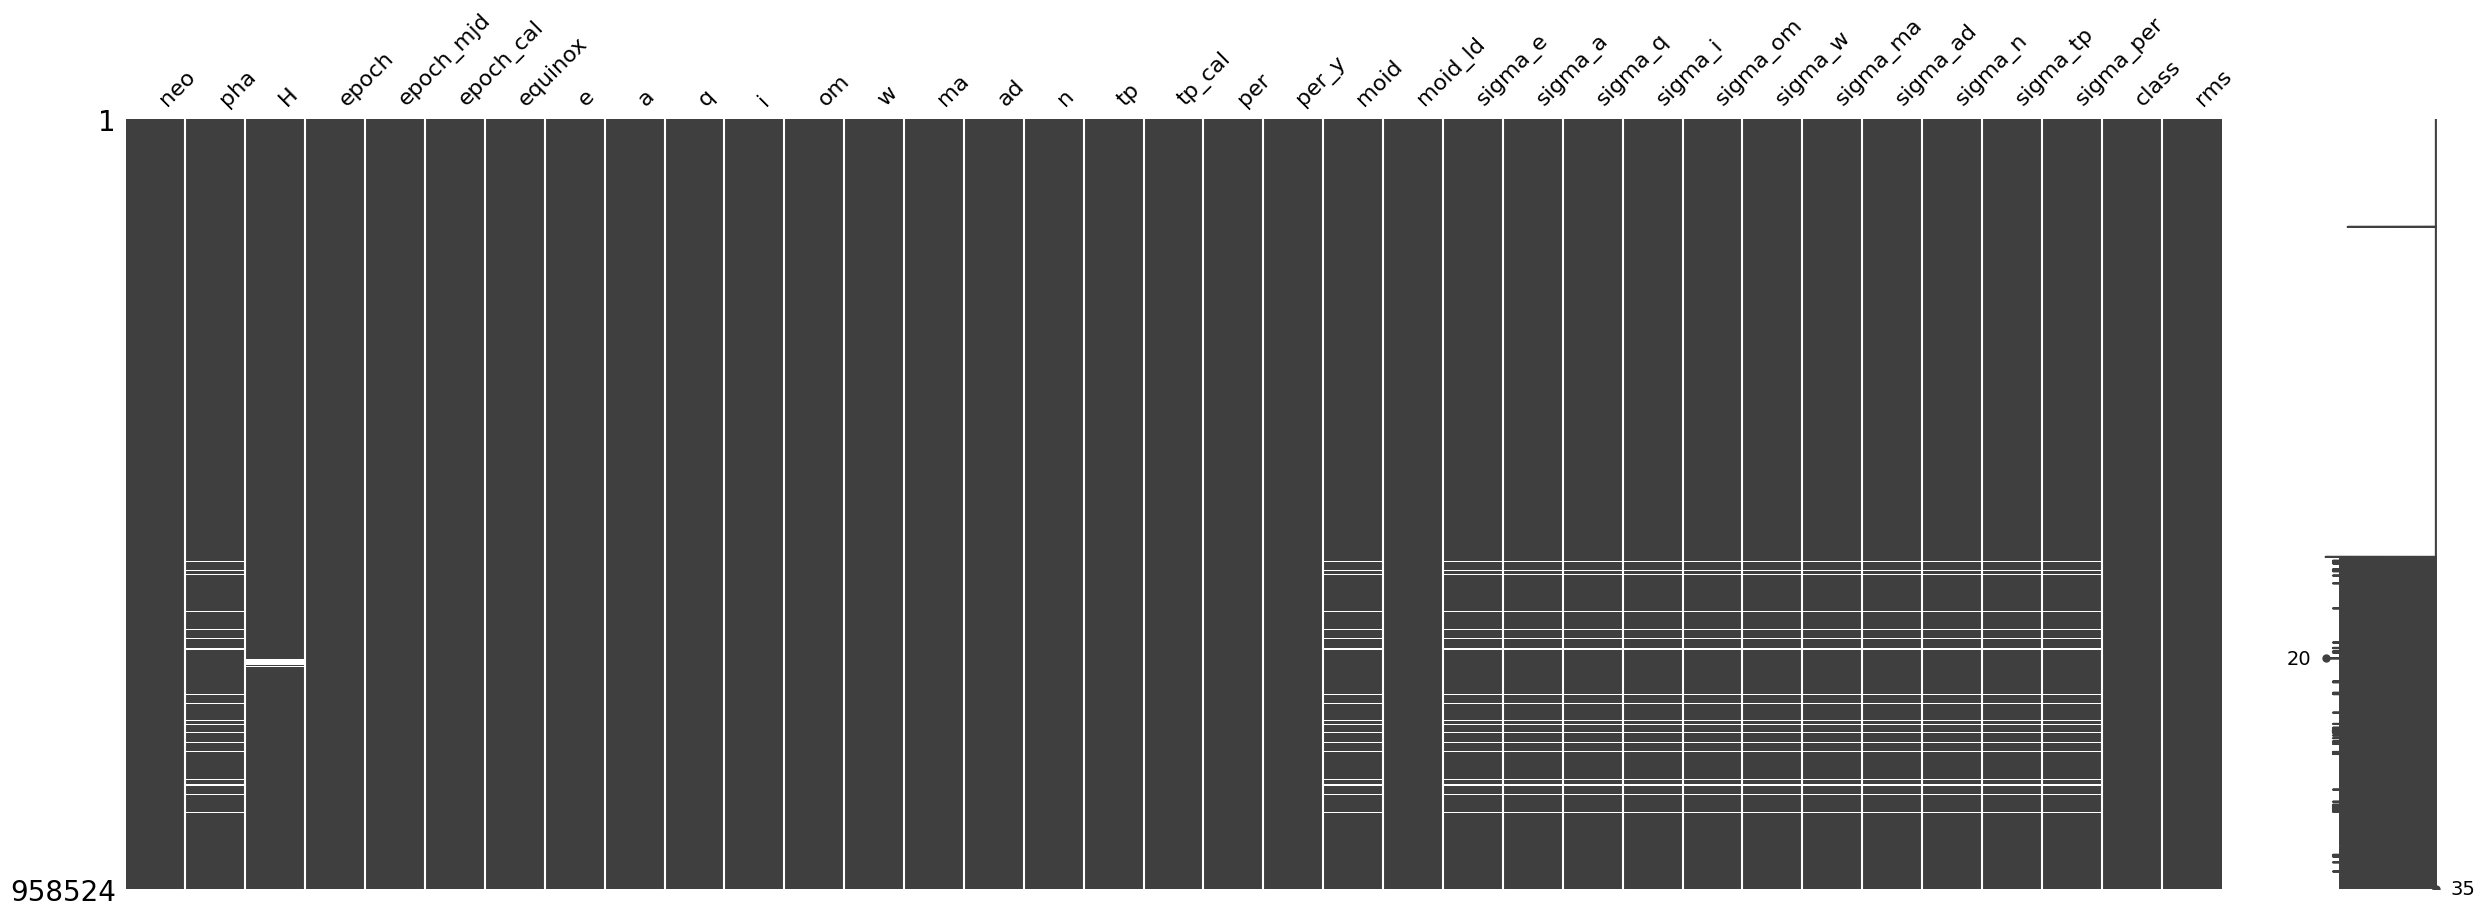

In [51]:
# Plottinhg the missing data matrix:
ms.matrix(df, figsize=(30, 10));

Apparently all the missing data in the *sigma* columns and in the *moid* column are related to the missing data contained in the Target column *pha* 

In [52]:
# Looking for 
df_2 = df[["pha", "moid", "sigma_e", "sigma_a", 
    "sigma_q", "sigma_i", "sigma_om", 
    "sigma_w", "sigma_ma", "sigma_ad",
    "sigma_n", "sigma_tp", "sigma_per"]]

df_2[df["pha"].isnull()]

,,pha,moid,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per
id,full_name,,,,,,,,,,,,,
bJ39R00R,(1939 RR),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bJ90O05K,(1990 OK5),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bJ91R28N,(1991 RN28),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bJ93T11C,(1993 TC11),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bJ94A09F,(1994 AF9),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bK20K03Q,(2020 KQ3),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bK20K03R,(2020 KR3),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bK20K03V,(2020 KV3),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As we can see above, 19921 from 19922 forom the missing data is related to the target column. So we can assume that this type of missingness is not at random. Since, we do not have target information about these rows, the best approach that I can see it is delete all of them.

In [53]:
# Dropping rows with missing data:
df.dropna(inplace=True)
df.isna().sum()

neo          0
pha          0
H            0
epoch        0
epoch_mjd    0
epoch_cal    0
equinox      0
e            0
a            0
q            0
i            0
om           0
w            0
ma           0
ad           0
n            0
tp           0
tp_cal       0
per          0
per_y        0
moid         0
moid_ld      0
sigma_e      0
sigma_a      0
sigma_q      0
sigma_i      0
sigma_om     0
sigma_w      0
sigma_ma     0
sigma_ad     0
sigma_n      0
sigma_tp     0
sigma_per    0
class        0
rms          0
dtype: int64

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 932335 entries, ('a0000001', '     1 Ceres') to ('bT3S2678', '       (2678 T-3)')
Data columns (total 35 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   neo        932335 non-null  object 
 1   pha        932335 non-null  object 
 2   H          932335 non-null  float64
 3   epoch      932335 non-null  float64
 4   epoch_mjd  932335 non-null  int64  
 5   epoch_cal  932335 non-null  float64
 6   equinox    932335 non-null  object 
 7   e          932335 non-null  float64
 8   a          932335 non-null  float64
 9   q          932335 non-null  float64
 10  i          932335 non-null  float64
 11  om         932335 non-null  float64
 12  w          932335 non-null  float64
 13  ma         932335 non-null  float64
 14  ad         932335 non-null  float64
 15  n          932335 non-null  float64
 16  tp         932335 non-null  float64
 17  tp_cal     932335 non-null  float64
 18  per       

Equinox and Class variables

In [55]:
# Looking at the unique data of equinox column:
df['equinox'].unique()

array(['J2000'], dtype=object)

Equinox variable has just 1 type of data, so it is not important for the analysis

In [56]:
# Dropping equinox column:
df.drop(columns=['equinox'], inplace=True)

In [57]:
# Looking at unique data of class column:
df['class'].unique()

array(['MBA', 'OMB', 'MCA', 'AMO', 'IMB', 'TJN', 'CEN', 'APO', 'ATE',
       'AST', 'TNO', 'IEO'], dtype=object)

There is no information about the class column, so I will drop it because it does

In [58]:
# Doropping class column:
df.drop(columns=['class'], inplace=True)

## 3) Exploratory Data Analysis

In [62]:
# Function that calculates kurtosis and skewness of a dataset:
def kurtosis_skewness(dataset: any):
    index = ["Kurtosis", "Skewness"]
    results = pd.DataFrame(index=index, columns=dataset.describe().columns)
    for c in dataset.describe().columns:
        kurt = kurtosis(dataset[c])
        skewness = skew(dataset[c])
        results[c] = [kurt, skewness]

    return results


# Heatmap of correlations:
def heatmap_cor(df: any):
    correlation = df.coRr()
    mask = np.zeros_like(correlation)
    mask[np.triu_indices_from(correlation)] = True
    sns.heatmap(correlation, mask=mask, annot=True, c="crest", cbar=True)
    

### 3.1) Descriptive Statistics

In [60]:
# Statistical Summary:
df.describe()

,H,epoch,epoch_mjd,epoch_cal,e,a,q,i,om,w,...,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms
count,932335.000000,9.323350e+05,932335.000000,9.323350e+05,932335.000000,932335.000000,932335.000000,932335.000000,932335.000000,932335.000000,...,9.323350e+05,9.323350e+05,9.323350e+05,9.323350e+05,9.323350e+05,9.323350e+05,9.323350e+05,9.323350e+05,9.323350e+05,9.323350e+05
mean,16.890009,2.458895e+06,58894.728019,2.019763e+07,0.156221,2.932576,2.398889,8.996685,168.395504,181.381528,...,1.980729e+01,9.920530e-01,4.104756e+00,4.305258e+05,4.304413e+05,2.120456e+01,2.471471e-02,1.281599e+08,8.559499e+04,5.669526e-01
std,1.801243,6.439097e+02,643.909665,1.775660e+04,0.093001,36.458214,2.165155,6.606939,102.863983,103.910012,...,2.913524e+03,1.284591e+02,1.337408e+03,7.330317e+07,7.329691e+07,7.221158e+03,9.820940e+00,2.194193e+10,2.776960e+07,2.783500e+00
min,-1.100000,2.425052e+06,25051.000000,1.927062e+07,0.000003,0.555418,0.070511,0.007744,0.000025,0.000130,...,1.956900e-11,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,3.292200e-11
25%,16.000000,2.459000e+06,59000.000000,2.020053e+07,0.092159,2.389088,1.972209,4.135562,80.528010,91.490632,...,1.457800e-07,6.080850e-06,3.604400e-05,5.733400e-05,2.562600e-05,2.330950e-08,2.758900e-09,1.105900e-04,1.786300e-05,5.220800e-01
50%,16.900000,2.459000e+06,59000.000000,2.020053e+07,0.144933,2.647971,2.227213,7.357845,159.871187,182.353840,...,2.256800e-07,8.645100e-06,6.583800e-05,1.037900e-04,4.853800e-05,4.320600e-08,4.605400e-09,2.207400e-04,3.469800e-05,5.680300e-01
75%,17.700000,2.459000e+06,59000.000000,2.020053e+07,0.200589,3.002982,2.580130,12.332702,251.974383,271.551596,...,6.203350e-07,1.554800e-05,1.568000e-04,2.978400e-04,1.626600e-04,1.143500e-07,1.077200e-08,7.716300e-04,9.360750e-05,6.149300e-01
max,33.200000,2.459000e+06,59000.000000,2.020053e+07,0.999851,33488.895955,80.398819,175.082901,359.999793,359.999646,...,1.015000e+06,5.533000e+04,1.199100e+06,3.340000e+10,3.339300e+10,5.509700e+06,7.698800e+03,1.041500e+13,1.910700e+10,2.686600e+03


In [63]:
# Printing Kurtosis and Skewness for every numerical column:
kurtosis_skewness(df)

,H,epoch,epoch_mjd,epoch_cal,e,a,q,i,om,w,...,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms
Kurtosis,9.493408,83.894824,83.894824,83.357429,7.855643,767091.797613,261.978318,21.382923,-1.107061,-1.200831,...,60968.169317,85940.252834,696329.202393,102305.367366,102271.306694,461840.374361,445468.333112,104891.525914,315876.432240,930054.212564
Skewness,0.628114,-7.853174,-7.853174,-7.842002,1.909468,847.534901,15.656983,2.214905,0.198321,-0.020474,...,227.797524,264.574094,792.125416,285.510390,285.466016,658.758084,625.886675,288.486739,536.782113,963.805589


## 4) Preprocessing

## 5) Fine Tuning

## 6) Predictions